In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from textblob import TextBlob

plt.style.use('ggplot')

import nltk
import streamlit as st

In [16]:
## Reading the clean data
df=pd.read_csv('C:\\Users\\Hp\\Desktop\\Python-FinalProject\\spotify-cleaned_data.csv')

##Scaling down the size of reviews for MVP
df=df.head(500)
df.head()

,ID,Review,Rating,Total_thumbsup
0,1.0,great music service audio high quality app eas...,5,2
1,2.0,please ignore previous negative rating app sup...,5,1
2,3.0,popup get best spotify experience android 12 a...,4,0
3,4.0,really buggy terrible use recently,1,1
4,5.0,dear spotify get songs didnt put playlist shuf...,1,1


-0.08194228699490436


DeltaGenerator()

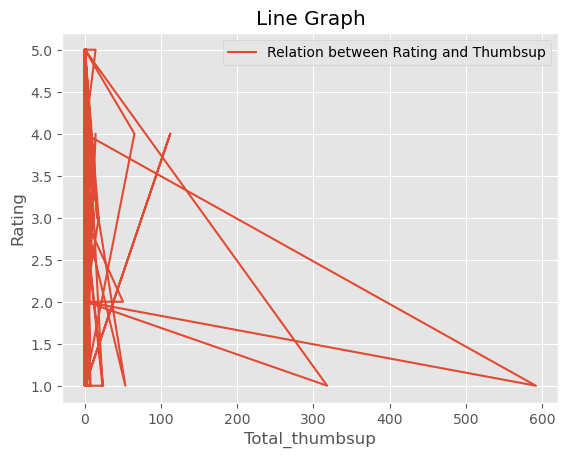

In [20]:
# Calculate the correlation coefficient
correlation = df['Rating'].corr(df['Total_thumbsup'])

# Print the correlation coefficient
print(correlation)


# Create the plot
# Calculate the correlation coefficient
correlation = df['Rating'].corr(df['Total_thumbsup'])

# Create the Streamlit app
st.title('Correlation between Thumbsup and Rating')

# Display the correlation coefficient
st.write('Correlation coefficient:', correlation)

# Create the plot
fig, ax = plt.subplots()
ax.plot(df['Total_thumbsup'], df['Rating'], label='Relation between Rating and Thumbsup')

# Add labels and title
ax.set_xlabel('Total_thumbsup')
ax.set_ylabel('Rating')
ax.set_title('Line Graph')

# Add legend
ax.legend()

# Add the plot to the Streamlit app
st.pyplot(fig)

In [19]:
subset_df = df.iloc[:10, :2]
st.dataframe(subset_df)

DeltaGenerator()

In [5]:
# Create a new column to store the sentiment of each comment
df["sentiment"] = df["Review"].apply(lambda text: TextBlob(text).sentiment.polarity)

# Count the number of positive, negative, and neutral comments
positive_comments = df[df["sentiment"] > 0].shape[0]
negative_comments = df[df["sentiment"] < 0].shape[0]
neutral_comments = df[df["sentiment"] == 0].shape[0]

# Print the results
print("Positive comments:", positive_comments)
print("Negative comments:", negative_comments)
print("Neutral comments:", neutral_comments)

Positive comments: 328
Negative comments: 111
Neutral comments: 61


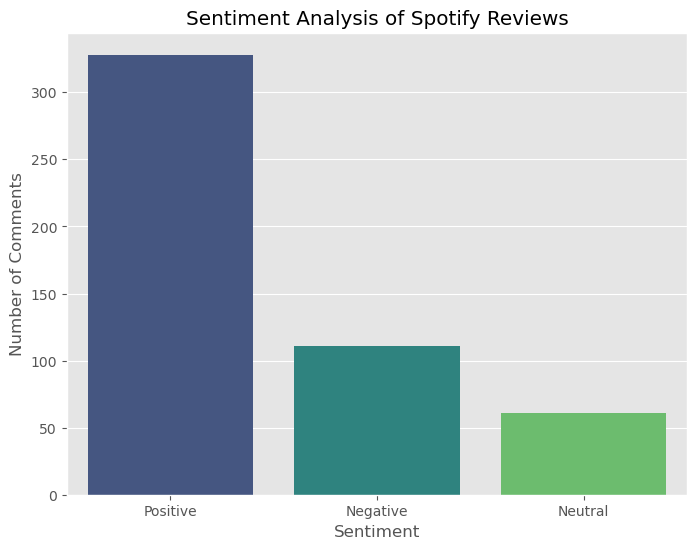

In [6]:
# Visualize the results using a bar plot
sentiment_counts = [positive_comments, negative_comments, neutral_comments]
sentiments = ['Positive', 'Negative', 'Neutral']

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiments, y=sentiment_counts, palette="viridis")
plt.title('Sentiment Analysis of Spotify Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

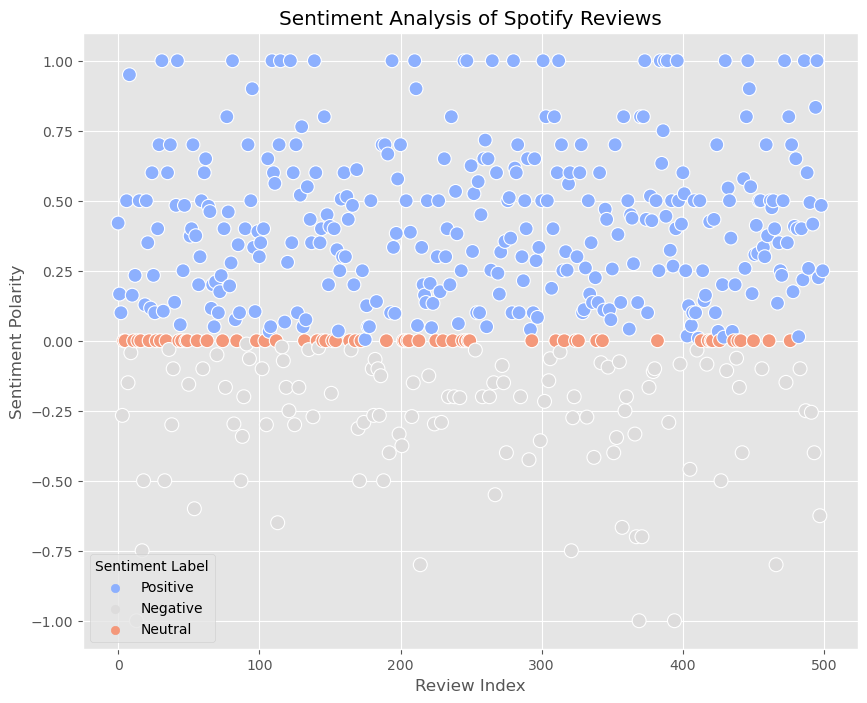

In [8]:
# Function to label sentiment
def get_sentiment_label(sentiment):
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment label to each row
df['sentiment_label'] = df['sentiment'].apply(get_sentiment_label)

# Visualize a few reviews with sentiment labels
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df.index, y=df["sentiment"], hue=df["sentiment_label"], palette="coolwarm", s=100)
plt.title('Sentiment Analysis of Spotify Reviews')
plt.xlabel('Review Index')
plt.ylabel('Sentiment Polarity')
plt.legend(title='Sentiment Label')
plt.show()


In [19]:
def create_sentiment(rating):
    
    if rating==1 or rating==2:
        return -1 # negative sentiment
    elif rating==4 or rating==5:
        return 1 # positive sentiment
    else:
        return 0 # neutral sentiment

df['Sentiment'] = df['Rating'].apply(create_sentiment)

In [20]:
df.head()

,ID,Review,Rating,Total_thumbsup,sentiment,sentiment_label,Sentiment
0,1.0,great music service audio high quality app eas...,5,2,0.420333,Positive,1
1,2.0,please ignore previous negative rating app sup...,5,1,0.166667,Positive,1
2,3.0,popup get best spotify experience android 12 a...,4,0,0.100000,Positive,1
3,4.0,really buggy terrible use recently,1,1,-0.266667,Negative,-1
4,5.0,dear spotify get songs didnt put playlist shuf...,1,1,0.000000,Neutral,-1


In [21]:
from sklearn.feature_extraction.text import re

def clean_data(review):
    
    no_punc = re.sub(r'[^\w\s]', '', review)
    no_digits = ''.join([i for i in no_punc if not i.isdigit()])
    
    return(no_digits)

df['Review'] = df['Review'].apply(clean_data)
df['Review'][0]

'great music service audio high quality app easy use also quick friendly support'

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None, 
                        lowercase=False,
                        preprocessor=None)

X = tfidf.fit_transform(df['Review'])

In [25]:
from sklearn.model_selection import train_test_split
y = df['Sentiment'] # target variable
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train) # fit the model
preds = lr.predict(X_test) # make predictions

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(preds,y_test) # 0.86

0.744